simple Q learning with epsilon greedy approach

In [1]:
import numpy as np
import gym 
import random
import matplotlib.pyplot as plt
from functions import Q_Learning

In [7]:
env=gym.make('CartPole-v1')
(state,_)=env.reset()

In [3]:
# here define the parameters for state discretization
upperBounds=env.observation_space.high
lowerBounds=env.observation_space.low
cartVelocityMin=-3
cartVelocityMax=3
poleAngleVelocityMin=-10
poleAngleVelocityMax=10
upperBounds[1]=cartVelocityMax
upperBounds[3]=poleAngleVelocityMax
lowerBounds[1]=cartVelocityMin
lowerBounds[3]=poleAngleVelocityMin
 
numberOfBinsPosition=30
numberOfBinsVelocity=30
numberOfBinsAngle=30
numberOfBinsAngleVelocity=30
numberOfBins=[numberOfBinsPosition,numberOfBinsVelocity,numberOfBinsAngle,numberOfBinsAngleVelocity]

In [11]:
# define the parameters
alpha=0.1
gamma=1
epsilon=0.5
numberEpisodes=5000

Simulating episode 0
Sum of rewards 18.0
Simulating episode 1
Sum of rewards 19.0
Simulating episode 2
Sum of rewards 18.0
Simulating episode 3
Sum of rewards 73.0
Simulating episode 4
Sum of rewards 19.0
Simulating episode 5
Sum of rewards 13.0
Simulating episode 6
Sum of rewards 24.0
Simulating episode 7
Sum of rewards 21.0
Simulating episode 8
Sum of rewards 43.0
Simulating episode 9
Sum of rewards 37.0
Simulating episode 10
Sum of rewards 18.0
Simulating episode 11
Sum of rewards 23.0
Simulating episode 12
Sum of rewards 54.0
Simulating episode 13
Sum of rewards 73.0
Simulating episode 14
Sum of rewards 22.0
Simulating episode 15
Sum of rewards 13.0
Simulating episode 16
Sum of rewards 17.0
Simulating episode 17
Sum of rewards 26.0
Simulating episode 18
Sum of rewards 14.0
Simulating episode 19
Sum of rewards 15.0
Simulating episode 20
Sum of rewards 68.0
Simulating episode 21
Sum of rewards 23.0
Simulating episode 22
Sum of rewards 18.0
Simulating episode 23
Sum of rewards 24.0
Si

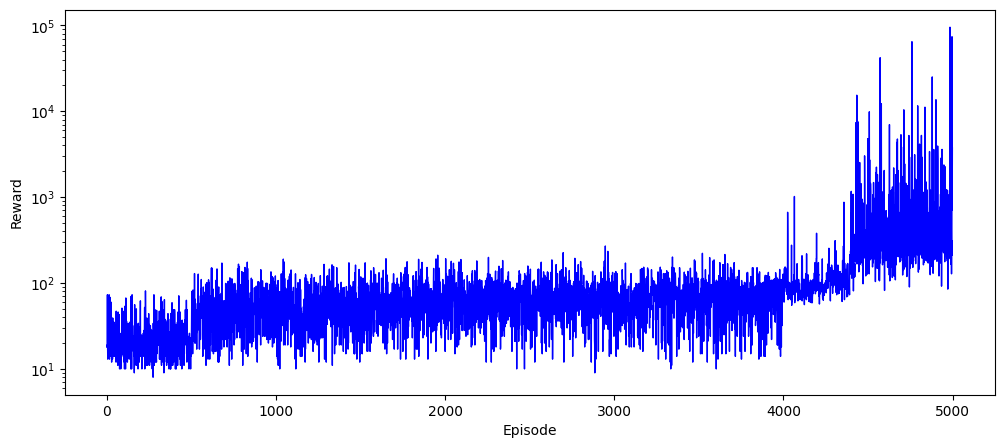

213.0

<Figure size 640x480 with 0 Axes>

: 

In [12]:
# create an object
Q1=Q_Learning(env,alpha,gamma,epsilon,numberEpisodes,numberOfBins,lowerBounds,upperBounds)
# run the Q-Learning algorithm
Q1.simulateEpisodes()
# simulate the learned strategy
(obtainedRewardsOptimal,env1)=Q1.simulateLearnedStrategy()
 
plt.figure(figsize=(12, 5))
# plot the figure and adjust the plot parameters
plt.plot(Q1.sumRewardsEpisode,color='blue',linewidth=1)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.yscale('log')
plt.show()
plt.savefig('convergence.png')
 
 
# close the environment
env1.close()
# get the sum of rewards
np.sum(obtainedRewardsOptimal)
 
# # now simulate a random strategy
# (obtainedRewardsRandom,env2)=Q1.simulateRandomStrategy()
# plt.hist(obtainedRewardsRandom)
# plt.xlabel('Sum of rewards')
# plt.ylabel('Percentage')
# plt.savefig('histogram.png')
# plt.show()
 
# # run this several times and compare with a random learning strategy
# (obtainedRewardsOptimal,env1)=Q1.simulateLearnedStrategy()

In [5]:
scoress = []
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info, _ = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scoress.append(score)
env.close()

/Users/yixinzhang/Desktop/cartpole/cptest/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode:1 Score:17.0
Episode:2 Score:33.0
Episode:3 Score:13.0
Episode:4 Score:20.0
Episode:5 Score:29.0
Episode:6 Score:37.0
Episode:7 Score:12.0
Episode:8 Score:14.0
Episode:9 Score:29.0
Episode:10 Score:18.0


In [6]:
max(scoress)

37.0

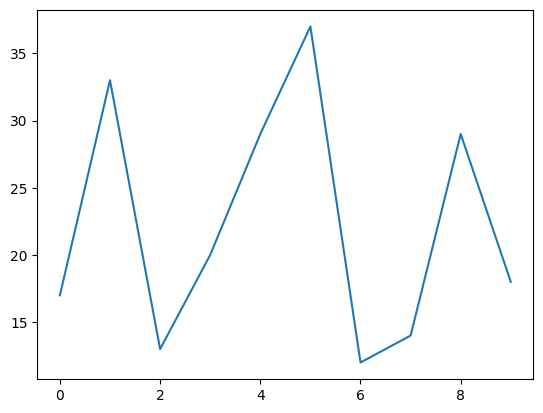

In [7]:
plt.plot(range(episode), scoress)
plt.rcParams["figure.figsize"] = (27,8)
plt.show()